In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [75]:
df = pd.read_csv('train.csv')
df.shape

(4250, 20)

In [76]:
sum(df.churn=='yes')

598

In [80]:
df.state.value_counts()

WV    139
MN    108
ID    106
AL    101
VA    100
OR     99
TX     98
UT     97
NJ     96
NY     96
WY     95
OH     95
WI     94
MA     89
ME     89
CT     88
KS     87
RI     87
MI     87
VT     86
MD     86
KY     85
IN     83
NV     83
MS     82
DE     80
CO     80
MT     80
WA     80
NC     80
MO     80
IL     79
TN     79
OK     78
NM     78
NH     78
HI     77
AZ     77
FL     76
SD     75
NE     73
SC     72
DC     72
AR     71
LA     69
ND     67
PA     67
GA     64
IA     62
AK     61
CA     39
Name: state, dtype: int64

In [77]:
598/4250

0.14070588235294118

In [71]:
df.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
state                            4250 non-null object
account_length                   4250 non-null int64
area_code                        4250 non-null object
international_plan               4250 non-null object
voice_mail_plan                  4250 non-null object
number_vmail_messages            4250 non-null int64
total_day_minutes                4250 non-null float64
total_day_calls                  4250 non-null int64
total_day_charge                 4250 non-null float64
total_eve_minutes                4250 non-null float64
total_eve_calls                  4250 non-null int64
total_eve_charge                 4250 non-null float64
total_night_minutes              4250 non-null float64
total_night_calls                4250 non-null int64
total_night_charge               4250 non-null float64
total_intl_minutes               4250 non-null float64
total_intl_calls           

## 1. Data Basics
#### Distribution

In [4]:
df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [6]:
np.unique(df.area_code)

array(['area_code_408', 'area_code_415', 'area_code_510'], dtype=object)

In [55]:
df[df.churn=='yes'].count()

state                            598
account_length                   598
area_code                        598
international_plan               598
voice_mail_plan                  598
number_vmail_messages            598
total_day_minutes                598
total_day_calls                  598
total_day_charge                 598
total_eve_minutes                598
total_eve_calls                  598
total_eve_charge                 598
total_night_minutes              598
total_night_calls                598
total_night_charge               598
total_intl_minutes               598
total_intl_calls                 598
total_intl_charge                598
number_customer_service_calls    598
churn                            598
dtype: int64

In [10]:
df.drop_duplicates(subset=['state','area_code']).sort_values(by='state').head(20)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
114,AK,127,area_code_510,no,yes,36,183.2,117,31.14,126.8,76,10.78,263.3,71,11.85,11.2,8,3.02,1,no
30,AK,136,area_code_415,yes,yes,33,203.9,106,34.66,187.6,99,15.95,101.7,107,4.58,10.5,6,2.84,3,no
28,AK,36,area_code_408,no,yes,30,146.3,128,24.87,162.5,80,13.81,129.3,109,5.82,14.5,6,3.92,0,no
113,AL,91,area_code_510,yes,no,0,129.9,112,22.08,173.3,83,14.73,247.2,130,11.12,11.2,3,3.02,3,no
93,AL,98,area_code_408,no,no,0,161.0,117,27.37,190.9,113,16.23,227.7,113,10.25,12.1,4,3.27,4,no
179,AL,106,area_code_415,no,no,0,223.0,121,37.91,110.1,98,9.36,188.7,107,8.49,7.1,12,1.92,0,no
77,AR,80,area_code_415,no,no,0,124.3,100,21.13,173.0,107,14.71,253.2,62,11.39,7.9,9,2.13,1,no
33,AR,34,area_code_510,no,no,0,124.8,82,21.22,282.2,98,23.99,311.5,78,14.02,10.0,4,2.70,2,no
112,AR,163,area_code_408,no,no,0,197.0,109,33.49,202.6,128,17.22,206.4,80,9.29,9.1,10,2.46,1,no
176,AZ,144,area_code_510,yes,no,0,203.5,100,34.60,247.6,103,21.05,194.3,94,8.74,11.9,11,3.21,0,no


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ac4f590>,
      dtype=object)

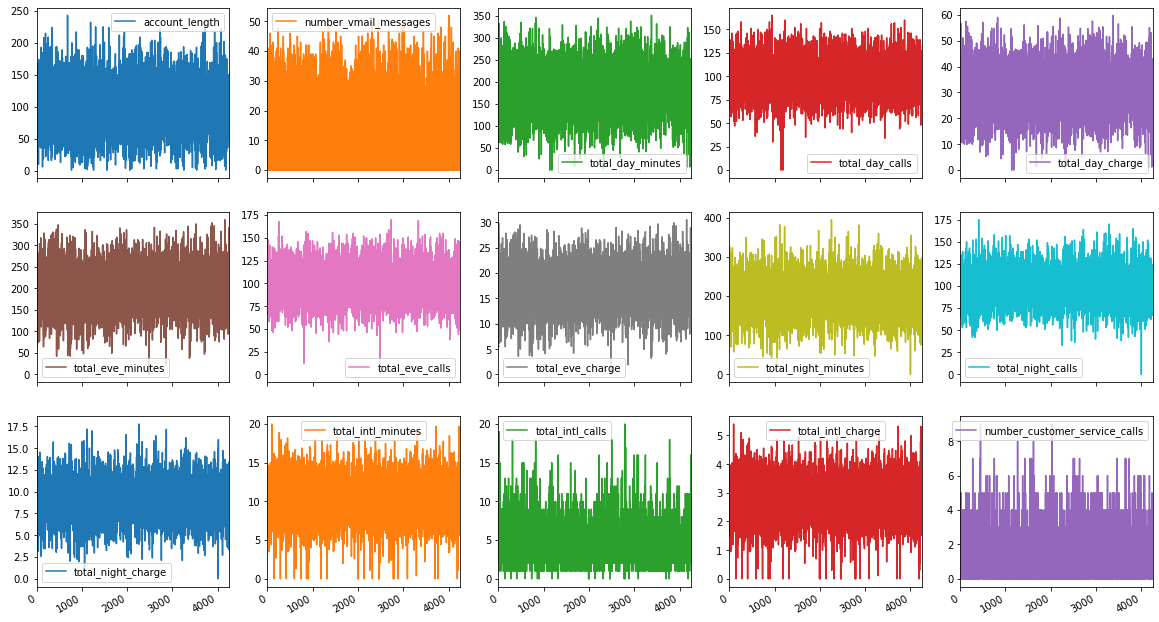

In [15]:
df.plot(subplots=True, layout=(4,5),figsize=(20,16))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121366b10>,
      dtype=object)

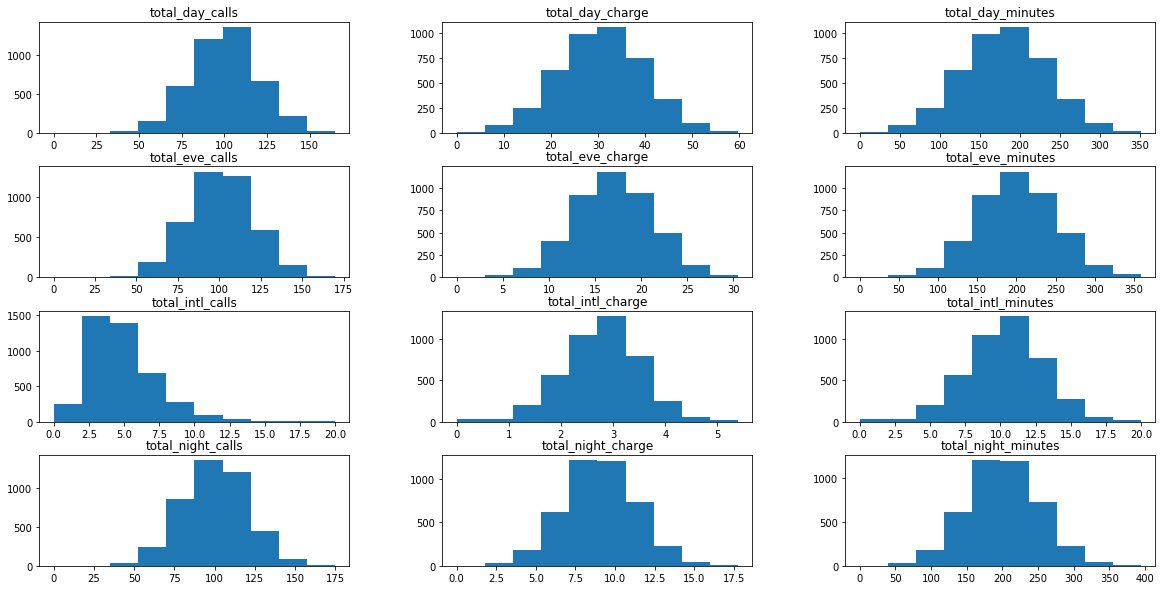

In [35]:
df[['total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge']].hist(figsize=(20,10),grid=False)

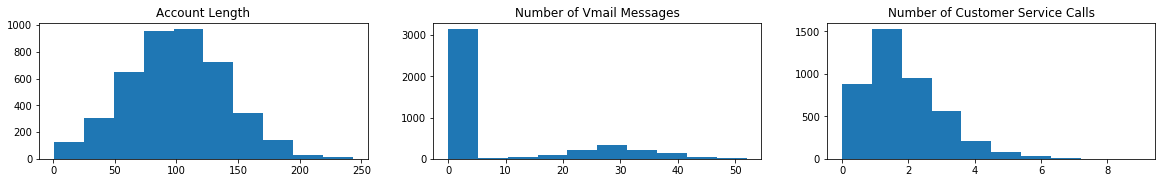

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(20,2.5))

account_length = df.account_length.hist(ax=axes[0],grid=False).set_title('Account Length')
number_vmail_messages = df.number_vmail_messages.hist(ax=axes[1],grid=False).set_title('Number of Vmail Messages')
c = df.number_customer_service_calls.hist(ax=axes[2],grid=False).set_title('Number of Customer Service Calls')


In [61]:
# map categorical variables to ints
category_col = ['international_plan', 'voice_mail_plan']
df[category_col] = np.array(df[category_col] == 'yes',dtype=np.int)
sum(df['international_plan']==1)

396

In [20]:
df.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [72]:
396/4250

0.09317647058823529

In [73]:
1112/4250

0.2616470588235294

* voice_mail_plan:1112
* international_plan:396

#### Correlation

In [42]:
df.corr()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
account_length,1.000000,-0.006626,-0.001612,0.023002,-0.001613,-0.010326,0.005535,-0.010322,-0.009916,-0.001846,-0.009942,0.004539,0.013690,0.004494,0.001002
number_vmail_messages,-0.006626,1.000000,0.002000,-0.006920,0.001994,0.010725,0.003593,0.010736,0.018308,0.001977,0.018300,0.005220,0.006585,0.005249,-0.015303
total_day_minutes,-0.001612,0.002000,1.000000,0.000747,1.000000,-0.013248,0.005986,-0.013258,0.010049,-0.004812,0.010036,-0.021369,0.003859,-0.021291,-0.002925
total_day_calls,0.023002,-0.006920,0.000747,1.000000,0.000751,0.008661,0.003739,0.008663,0.002206,-0.004815,0.002200,0.008834,0.009377,0.008909,-0.015845
total_day_charge,-0.001613,0.001994,1.000000,0.000751,1.000000,-0.013247,0.005985,-0.013257,0.010053,-0.004816,0.010040,-0.021374,0.003853,-0.021296,-0.002932
total_eve_minutes,-0.010326,0.010725,-0.013248,0.008661,-0.013247,1.000000,0.003101,1.000000,-0.014018,0.011973,-0.014031,-0.003509,0.012239,-0.003460,-0.010063
total_eve_calls,0.005535,0.003593,0.005986,0.003739,0.005985,0.003101,1.000000,0.003120,0.008425,-0.011929,0.008441,-0.013096,0.004949,-0.013145,0.006956
total_eve_charge,-0.010322,0.010736,-0.013258,0.008663,-0.013257,1.000000,0.003120,1.000000,-0.014022,0.011971,-0.014035,-0.003512,0.012239,-0.003463,-0.010071
total_night_minutes,-0.009916,0.018308,0.010049,0.002206,0.010053,-0.014018,0.008425,-0.014022,1.000000,0.023815,0.999999,-0.000113,-0.024280,-0.000047,-0.013771
total_night_calls,-0.001846,0.001977,-0.004812,-0.004815,-0.004816,0.011973,-0.011929,0.011971,0.023815,1.000000,0.023798,0.001093,0.003851,0.001054,-0.008893


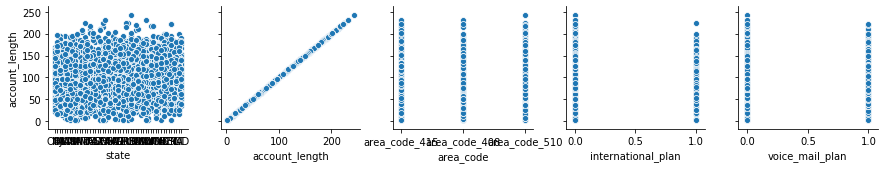

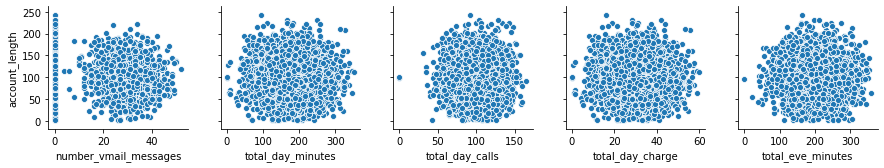

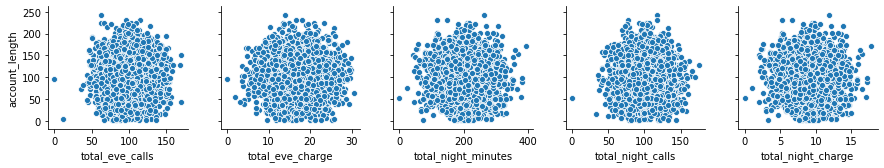

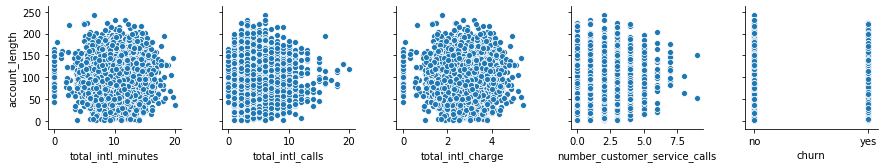

In [62]:

import seaborn as sns
for i in range(0, len(df.columns), 5):
    sns.pairplot(data=df,
                x_vars=df.columns[i:i+5],
                y_vars=['account_length'])

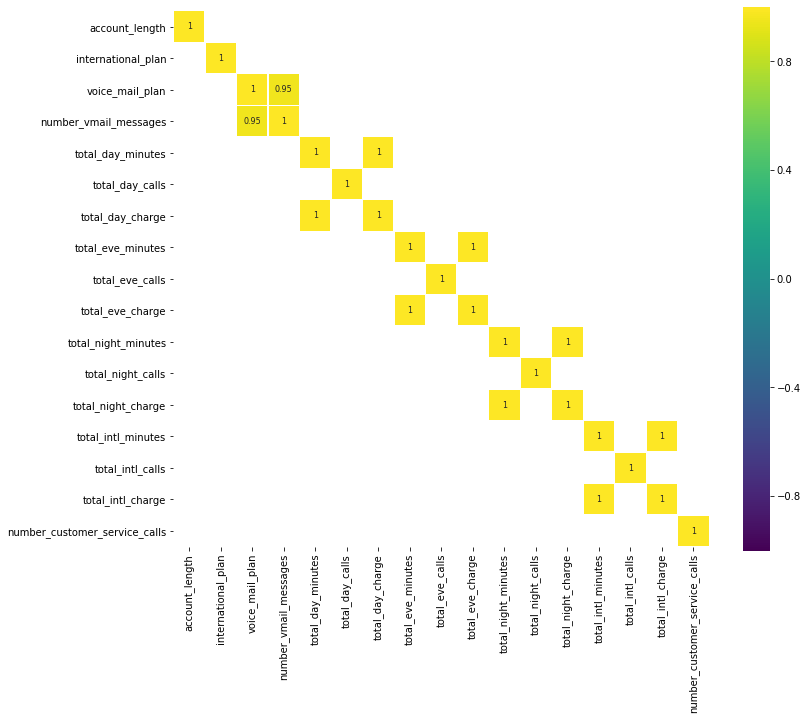

In [64]:
corr = df.corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

minutes and charge variables have a correlation of 1. So I drop minutes columns and number_vmail_messages column.

In [66]:
# exclude highly correlated predictors...
df.drop(labels=['total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge','number_vmail_messages'],
        inplace=True, axis=1)
df.columns

KeyError: "['total_day_charge' 'total_eve_charge' 'total_night_charge'\n 'total_intl_charge' 'number_vmail_messages'] not found in axis"

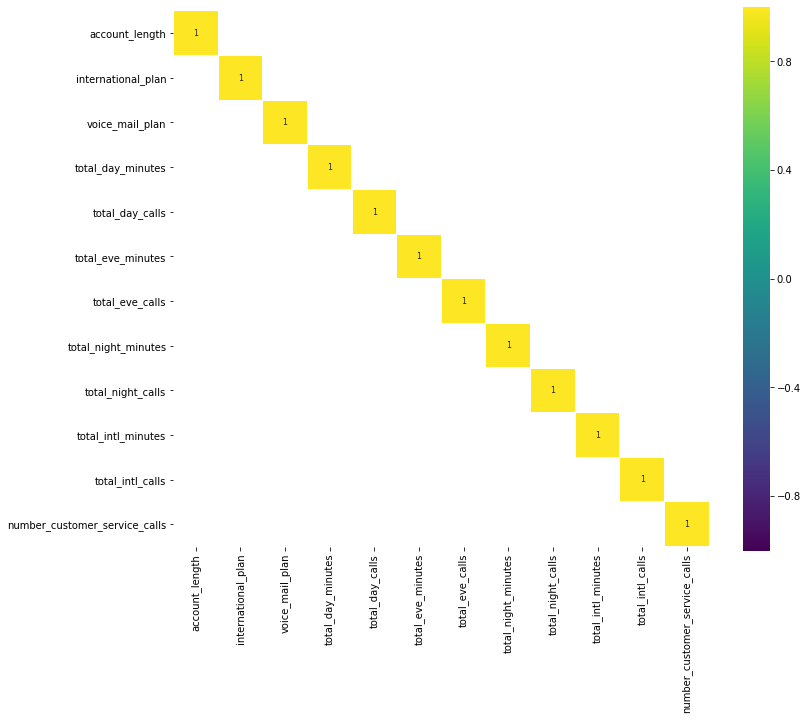

In [67]:
corr = df.corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [68]:
df['churn'] = np.array(df['churn'] == 'yes',dtype=np.int)
np.sum(df['churn'])

598

## 2. Models

In [5]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score
from xgboost import plot_importance
from sklearn.linear_model import Lasso,LassoCV,LassoLarsCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from sklearn import linear_model
from xgboost import XGBClassifier
from numpy import sort
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix

In [4]:
import sys
!conda install --yes --prefix {sys.prefix} xgboost

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0           8 KB
    cctools_osx-64-949.0.1     |      hc7db93f_23         1.3 MB
    clangxx-12.0.0             |default_hfcad0e5_2         135 KB
    compiler-rt_osx-64-12.0.0  |       hfb26b64_2         1.4 MB
    ldid-2.1.2                 |       h2d21305_2          54 KB
    libcxx-12.0.0              |       h2f01273_0         805 KB
    libxgboost-1.5.0           |       he9d5cce_1         1.2 MB
    py-xgboost-1.5.0           |   py37hecd8cb5_1         165 KB
    xgboost-1.5.0              |   py37hecd8cb5_1          25 KB
    ------------------------------------------------------------
                                           Total:         5.1 MB

The followi

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'total_day_minutes', 'total_day_calls',
       'total_eve_minutes', 'total_eve_calls', 'total_night_minutes',
       'total_night_calls', 'total_intl_minutes', 'total_intl_calls',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 16 columns):
state                            4250 non-null object
account_length                   4250 non-null int64
area_code                        4250 non-null object
international_plan               4250 non-null object
voice_mail_plan                  4250 non-null object
number_vmail_messages            4250 non-null int64
total_day_minutes                4250 non-null float64
total_day_calls                  4250 non-null int64
total_eve_minutes                4250 non-null float64
total_eve_calls                  4250 non-null int64
total_night_minutes              4250 non-null float64
total_night_calls                4250 non-null int64
total_intl_minutes               4250 non-null float64
total_intl_calls                 4250 non-null int64
number_customer_service_calls    4250 non-null int64
churn                            4250 non-null object
dtypes: float64(4), int64(7), ob

In [28]:
churnmap = {'yes': 1, 'no': 0}
df = df.replace({'churn': churnmap})
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0
1,NJ,137,area_code_415,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0
2,OH,84,area_code_408,yes,no,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0
3,OK,75,area_code_415,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0
4,MA,121,area_code_510,no,yes,24,218.2,88,348.5,108,212.6,118,7.5,7,3,0


### 2.1 Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X, Y)
LR.predict(X.iloc[460:,:])
round(LR.score(X,Y), 4)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8579

### 2.2 SVM

In [37]:
from sklearn import svm

SVM = svm.LinearSVC()
SVM.fit(X, Y)
round(SVM.score(X,Y), 4)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.8633

### 2.3 RF

In [38]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
RF.fit(X, Y)
round(RF.score(X,Y), 4)

0.8593

### 2.4 Neural Network

In [39]:
from sklearn.neural_network import MLPClassifier

NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
NN.fit(X, Y)
round(NN.score(X,Y), 4)

0.8593

### 2.5 XGBoost

In [20]:
cat = df[['state', 'area_code', 'international_plan', 'voice_mail_plan']]
no_cat = df[['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_eve_minutes', 'total_eve_calls',
       'total_night_minutes', 'total_night_calls', 'total_intl_minutes',
       'total_intl_calls', 'number_customer_service_calls']]


In [29]:
cat = cat.fillna("")
lbl = preprocessing.LabelEncoder()
cat_lbl = cat.astype(str).apply(lbl.fit_transform)

In [30]:
colname1 = list(cat.columns)
colname2 = list(no_cat.columns)

In [31]:
# 组合X & y
X = pd.concat([cat_lbl, no_cat], axis=1, ignore_index=True)
X.columns = colname1+colname2
Y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=7,stratify=df['churn'])


In [45]:
param0 = {'objective':'binary:logistic',           
          'eta':0.3,                             
          'silent':1,
          'max_depth' :10,
          'min_child_weight':1,
          'gamma':0,
          'subsample':0.9,
          'scale_pos_weight':0.25
         }
train = xgb.DMatrix(X_train,label=y_train)
test = xgb.DMatrix(X_test,label=y_test)

num_round = 20
bst = xgb.train(param0,train,num_round)
pred = bst.predict(test)
pred2 = [round(x) for x in pred]
print(accuracy_score(y_test,pred2),roc_auc_score(y_test,pred2))

[01:11:03] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[01:11:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9482352941176471 0.837895538196743


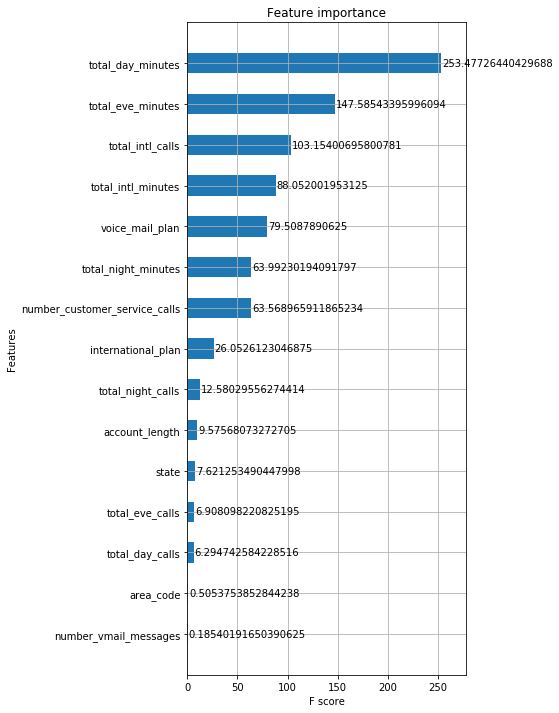

In [34]:
#重要度
fig,ax = plt.subplots(figsize=(5,12))
plot_importance(bst,
                height=0.5,
                ax=ax,
                max_num_features = 50,
                importance_type = 'total_gain')
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

In

LR: 0.096658 (0.040166)
LDA: 0.252297 (0.052509)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: 0.310124 (0.066508)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


CART: 0.709650 (0.067627)
NB: 0.414900 (0.064363)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM: 0.038649 (0.023899)
[03:37:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:37:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:37:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:37:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:37:37] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

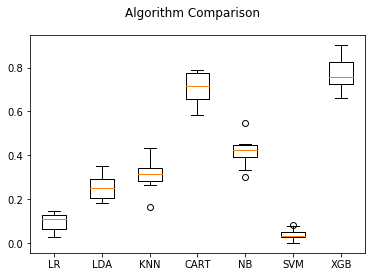

In [74]:
# Compare Algorithms
from sklearn import model_selection
# https://blog.csdn.net/qq_32590631/article/details/82831613
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset
array = df.values
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))
# evaluate each model in turn
results = []
names = []
####
# scoring = 'auc'
scoring = 'recall'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [78]:
4520/51

88.62745098039215